In [4]:
### Se realizara un analisis de la economia Mexicana en comparasion con el resto de norteamerica para comparar
### el poder adquisitivo

import numpy as np ## para algebra lineal
import pandas as pd ## panel data

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns ### visualizaciones

In [3]:
### importamos datos de la oecd sobre gasto neto por vivienda (millones de usd)
df = pd.read_csv(r'C:\Users\diego\Desktop\business_intelligence\household_spending.csv')

In [4]:
df.columns = df.columns.str.lower() ### limpiamos columnas

In [5]:
df.columns

Index(['location', 'indicator', 'subject', 'measure', 'frequency', 'time',
       'value', 'flag codes'],
      dtype='object')

In [6]:
df.drop('flag codes', axis=1, inplace=True) ##quitamos columna inncesaria

In [7]:
df.location.values

array(['AUS', 'AUS', 'AUS', 'AUS', 'AUT', 'AUT', 'AUT', 'AUT', 'AUT',
       'BEL', 'BEL', 'BEL', 'BEL', 'BEL', 'CAN', 'CAN', 'CAN', 'CAN',
       'CAN', 'CZE', 'CZE', 'CZE', 'CZE', 'CZE', 'DNK', 'DNK', 'DNK',
       'DNK', 'DNK', 'FIN', 'FIN', 'FIN', 'FIN', 'FIN', 'FRA', 'FRA',
       'FRA', 'FRA', 'FRA', 'DEU', 'DEU', 'DEU', 'DEU', 'DEU', 'GRC',
       'GRC', 'GRC', 'GRC', 'GRC', 'HUN', 'HUN', 'HUN', 'HUN', 'HUN',
       'ISL', 'ISL', 'ISL', 'ISL', 'ISL', 'IRL', 'IRL', 'IRL', 'IRL',
       'IRL', 'ITA', 'ITA', 'ITA', 'ITA', 'ITA', 'JPN', 'JPN', 'JPN',
       'JPN', 'KOR', 'KOR', 'KOR', 'KOR', 'LUX', 'LUX', 'LUX', 'LUX',
       'LUX', 'MEX', 'MEX', 'MEX', 'MEX', 'NLD', 'NLD', 'NLD', 'NLD',
       'NLD', 'NZL', 'NZL', 'NZL', 'NZL', 'NOR', 'NOR', 'NOR', 'NOR',
       'NOR', 'POL', 'POL', 'POL', 'POL', 'POL', 'PRT', 'PRT', 'PRT',
       'PRT', 'PRT', 'SVK', 'SVK', 'SVK', 'SVK', 'SVK', 'ESP', 'ESP',
       'ESP', 'ESP', 'ESP', 'SWE', 'SWE', 'SWE', 'SWE', 'SWE', 'CHE',
       'CHE', 'CHE',

In [12]:
keep_values = ['MEX', 'CAN', 'USA']

df_na = df[df["location"].isin(keep_values)] ### tomamos Mexico, USA y Canada

In [14]:
df_na.head(30)

df_plot = df_na[['location', 'time', 'value']] ### tomamos columnas relevantes al plot

In [15]:
df_plot.head()

,location,time,value
14,CAN,2017,9.557987e+05
15,CAN,2018,1.004436e+06
16,CAN,2019,1.002552e+06
17,CAN,2020,9.537159e+05
18,CAN,2021,1.026028e+06


In [16]:
print(df_plot.pivot(index='location', columns ='time', values='value' )) ### preparamos datos para el plot

time              2017          2018          2019          2020         2021
location                                                                     
CAN       9.557987e+05  1.004436e+06  1.002552e+06  9.537159e+05  1026027.635
MEX       1.411418e+06  1.472096e+06  1.470264e+06  1.372222e+06          NaN
USA       1.323911e+07  1.391353e+07  1.442868e+07  1.404756e+07          NaN


Text(0.5, 1.0, 'Gasto por vivienda en ciento de miles de millones de dolares (OECD)')

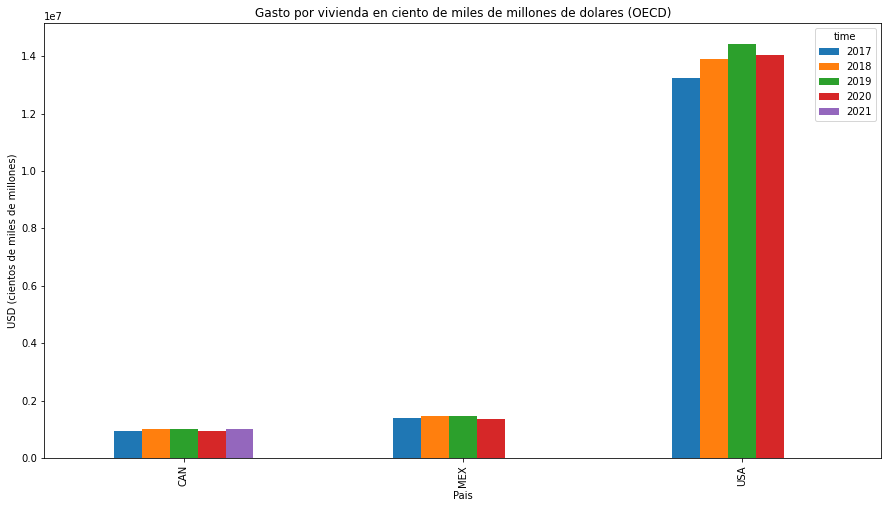

In [20]:
df_plot.pivot(index='location', columns = 'time', values='value').plot(kind='bar', figsize = (15,8))

plt.xlabel('Pais')

plt.ylabel ('USD (cientos de miles de millones)')

plt.title('Gasto por vivienda en ciento de miles de millones de dolares (OECD)')

In [4]:
import pandas as pd
df_web = pd.read_csv(r'C:\Users\diego\Desktop\business_intelligence\internet_access.csv')

### importamos pandas y dataset de la OECD con datos sobre acceso al internet

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df_web.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,BEL,INTERNET,TOT,PC_HH,A,2005,50.1575,NaN
1,BEL,INTERNET,TOT,PC_HH,A,2006,53.9597,NaN
2,BEL,INTERNET,TOT,PC_HH,A,2007,60.1640,NaN
3,BEL,INTERNET,TOT,PC_HH,A,2008,63.6276,NaN
4,BEL,INTERNET,TOT,PC_HH,A,2009,67.4352,NaN


In [9]:
df_web.columns = df_web.columns.str.lower()

df_web.columns

Index(['location', 'indicator', 'subject', 'measure', 'frequency', 'time',
       'value', 'flag codes'],
      dtype='object')

In [14]:
keep_columns = ['location','time', 'value']

keep_values = ['MEX', 'USA', 'CAN']

In [11]:
df_web1 = df_web[df_web['location'].isin(keep_values)]

In [15]:
df_web2 = df_web1[(keep_columns)]

In [26]:
df_web3 = df_web2.pivot(index='location', columns='time', values='value') ### notamos que faltan datos para USA

In [30]:
df_web3.head()

time,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
location,,,,,,,,,,,,,,,,
CAN,64.3,68.10,72.70,74.6,77.80,78.30,80.40,81.40,83.700000,84.900000,86.900000,87.400000,89.000000,93.60000,91.000000,94.20000
MEX,9.0,10.13,12.00,13.5,18.36,22.19,23.27,25.97,30.743459,34.392739,39.177739,47.017121,50.922621,52.86463,56.356869,60.55397
USA,NaN,NaN,61.78,NaN,68.69,71.06,71.70,74.76,74.150000,NaN,73.370000,NaN,77.970000,NaN,79.880000,NaN


In [49]:
df_pivot = df_web2.pivot(index='time', columns='location', values='value')

df_pivot.interpolate(method='linear', axis=0, inplace=True) ### usamos interpolacion lineal para predecir valores faltantes

df_pivot.tail()

location,CAN,MEX,USA
time,,,
2016,87.4,47.017121,75.670
2017,89.0,50.922621,77.970
2018,93.6,52.864630,78.925
2019,91.0,56.356869,79.880
2020,94.2,60.553970,79.880


Text(0, 0.5, '% de poblacion')

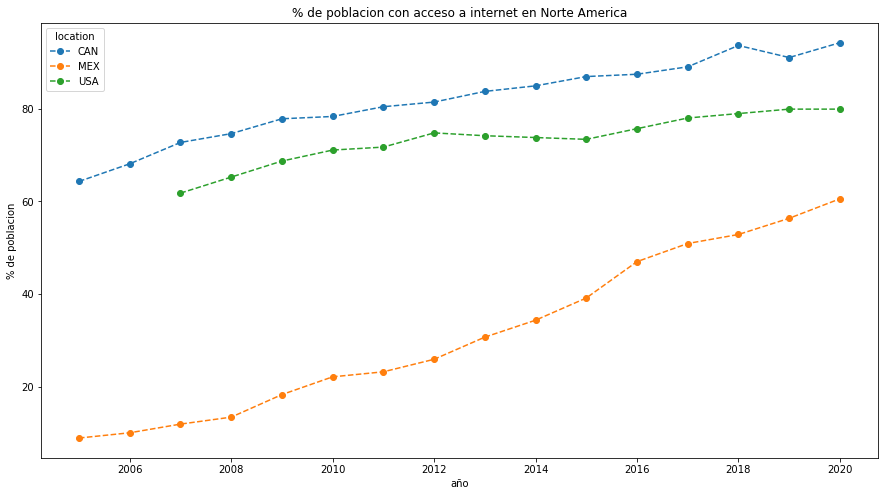

In [54]:
df_pivot.plot(kind='line', figsize=(15,8), linestyle='dashed', marker='o')

plt.title('% de poblacion con acceso a internet en Norte America')

plt.xlabel('año')

plt.ylabel('% de poblacion')

In [5]:
df_pop = pd.read_csv(r'C:\Users\diego\Desktop\business_intelligence\population_distribution.csv')

In [6]:
df_pop.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [7]:
df_pop['SUBJECT'].unique()

array(['INTMD', 'RURAL', 'URBAN'], dtype=object)

In [8]:
vio_plot = df_pop[['SUBJECT', 'Value']]

vio_plot.head()

,SUBJECT,Value
0,INTMD,48.3
1,INTMD,42.1
2,RURAL,36.1
3,INTMD,38.2
4,RURAL,12.1


In [2]:
import seaborn as sns

In [10]:
value = vio_plot.Value
group = vio_plot.SUBJECT
print(value)

0      48.3
1      42.1
2      36.1
3      38.2
4      12.1
       ... 
103    44.1
104    59.9
105    31.1
106    41.8
107    27.1
Name: Value, Length: 108, dtype: float64


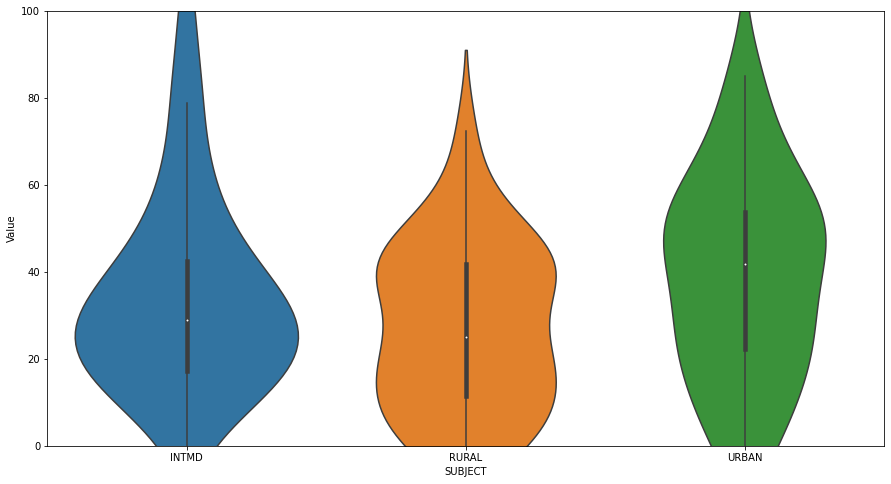

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = sns.violinplot(x=group, y=value, data=vio_plot, figsize=(15,8))
ax.set(ylim=(0, 100))
plt.show()

In [15]:
df_pop[df_pop['LOCATION'].isin(keep_values)].pivot(index='LOCATION', columns='SUBJECT', values='Value')

SUBJECT,INTMD,RURAL,URBAN
LOCATION,,,
CAN,16.0,27.6,56.4
MEX,17.4,36.6,46.0
USA,20.2,37.7,42.1
